In [23]:
#import all required packages and modules.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D, Dropout, LSTM, GRU, Bidirectional, SpatialDropout1D,ConvLSTM2D
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import Constant
from tensorflow.keras.regularizers import l1, l2

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import nltk
import nltk.corpus
import string
import re
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import WordNetLemmatizer

In [24]:
#load train and test data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_data

,Id,Category,Title
0,0,sport,Roddick in talks over new coach
1,1,entertainment,Prodigy join V Festival line-up
2,2,entertainment,Sundance to honour foreign films
3,3,sport,Dunne keen to commit to Man City
4,4,politics,Row over 'police' power for CSOs
...,...,...,...
1775,1775,business,Lufthansa may sue over Bush visit
1776,1776,tech,Rolling out next generation's net
1777,1777,sport,Mirza makes Indian tennis history
1778,1778,tech,GTA sequel is criminally good


In [25]:
X = train_data.drop(['Category'], axis=1)
test_X = test_data
Y = train_data['Category']
print(Y.value_counts())
#text preprocess
for i in range(len(X)):
    #轉成小寫
    X['Title'][i] = X['Title'][i].lower()
    #移除數字
    X['Title'][i] = re.sub(r'\d+', '', X['Title'][i])
    #Remove punctuation
    X['Title'][i] = X['Title'][i].translate(str.maketrans("", "", string.punctuation))
    #移除white space
    X['Title'][i] = X['Title'][i].strip()
print(X)
for i in range(len(test_X)):
    test_X['Title'][i] = test_X['Title'][i].lower()
    test_X['Title'][i] = re.sub(r'\d+', '', test_X['Title'][i])
    test_X['Title'][i] = test_X['Title'][i].translate(str.maketrans("", "", string.punctuation))
    test_X['Title'][i] = test_X['Title'][i].strip()

business         424
sport            400
tech             323
politics         319
entertainment    314
Name: Category, dtype: int64


<ipython-input-25-bf52e6919eac>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Title'][i] = X['Title'][i].lower()
<ipython-input-25-bf52e6919eac>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Title'][i] = re.sub(r'\d+', '', X['Title'][i])
<ipython-input-25-bf52e6919eac>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Title'][i] = X['Title'][i].translate(str.maketrans("", "", string.punctuation))
<ipython-input-25-bf52e

        Id                              Title
0        0    roddick in talks over new coach
1        1     prodigy join v festival lineup
2        2   sundance to honour foreign films
3        3   dunne keen to commit to man city
4        4     row over police power for csos
...    ...                                ...
1775  1775  lufthansa may sue over bush visit
1776  1776   rolling out next generations net
1777  1777  mirza makes indian tennis history
1778  1778      gta sequel is criminally good
1779  1779     goahead for new internet names

[1780 rows x 2 columns]


<ipython-input-25-bf52e6919eac>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_X['Title'][i] = test_X['Title'][i].lower()
<ipython-input-25-bf52e6919eac>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_X['Title'][i] = re.sub(r'\d+', '', test_X['Title'][i])
<ipython-input-25-bf52e6919eac>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_X['Title'][i] = test_X['Title'][i].translate(str.maketrans("", "", string.punctu

In [26]:
#tokenization:splitting the given text into smaller pieces called tokens
#移除stop word(像是a, the, is)
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('english')
for i in range(len(X)):
    tokens = word_tokenize(X['Title'][i])
    X['Title'][i] = [j for j in tokens if not j in stop_words]
for i in range(len(test_X)):
    test_tokens = word_tokenize(test_X['Title'][i])
    test_X['Title'][i] = [j for j in test_tokens if not j in stop_words]
# #lemmatization:reduce inflectional forms to a common base form.
# nltk.download('wordnet')
# lemmatizer=WordNetLemmatizer()
# string = ""
# for i in range(len(X)):
#     X['Title'][i] = [lemmatizer.lemmatize(w) for w in X['Title'][i]]
# for i in range(len(test_X)):
#     test_X['Title'][i] = [lemmatizer.lemmatize(w) for w in test_X['Title'][i]]
# print(X)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Alan_Lin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-26-078085196c5d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Title'][i] = [j for j in tokens if not j in stop_words]
<ipython-input-26-078085196c5d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_X['Title'][i] = [j for j in test_tokens if not j in stop_words]


In [27]:
#用label encoder將label轉成(0 1 2 3)
le = LabelEncoder()
le.fit(Y)
Y = le.transform(Y)
print(Y)

train_text = np.array(X['Title'])
MAX_SEQUENCE_LENGTH = 8 #10
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_text)
train_sequence = tokenizer.texts_to_sequences(train_text)
word_index = tokenizer.word_index
train_text_data = pad_sequences(train_sequence, maxlen = MAX_SEQUENCE_LENGTH)
train_text_labels = to_categorical(np.asarray(Y))
print('Shape of data tensor:', train_text_data.shape)
print('Shape of label tensor:', train_text_labels.shape)
print(len(word_index))
print(train_text_data)

test_text = np.array(test_X['Title'])
# tokenizer = Tokenizer()
# tokenizer.fit_on_texts(test_text)
test_sequence = tokenizer.texts_to_sequences(test_text)
#word_index = tokenizer.word_index
test_text_data = pad_sequences(test_sequence, maxlen = MAX_SEQUENCE_LENGTH)

[3 1 1 ... 3 4 4]
Shape of data tensor: (1780, 8)
Shape of label tensor: (1780, 5)
3266
[[   0    0    0 ...   60    2  197]
 [   0    0    0 ...  158  260  497]
 [   0    0    0 ...  159  754  499]
 ...
 [   0    0    0 ...  313  446  474]
 [   0    0    0 ... 1329 3266  952]
 [   0    0    0 ...    2  469  368]]


In [28]:
EMBEDDING_DIM = 300
embeddings_index = {}
with open('glove.6B.'+str(EMBEDDING_DIM)+'d.txt', encoding="utf-8") as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, 'f', sep=' ')
        embeddings_index[word] = coefs
        
#Create glove embedding matrix
embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
QQ=0
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word.lower())
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector
    else:
        QQ = QQ+1

print('Found %s word vectors.' % len(embeddings_index))
#Keras Glove Embedding layer
embedding_layer = Embedding(len(word_index) + 1, EMBEDDING_DIM, weights=[embedding_matrix], input_length = MAX_SEQUENCE_LENGTH, trainable=True)

Found 400000 word vectors.
Wall time: 1min 56s


In [29]:
print(QQ)

105

In [30]:
print(embedding_matrix.shape)
embedding_matrix[296]

(3267, 300)


array([ 1.95669994e-01,  5.24219990e-01, -2.25590006e-01,  7.61259973e-01,
       -1.67300001e-01,  1.94590002e-01, -1.24689996e+00, -5.17260015e-01,
        7.55039990e-01,  6.35490000e-01,  6.62469983e-01,  3.87750000e-01,
        2.02649996e-01,  5.51900029e-01, -7.24730015e-01, -4.00319993e-01,
       -4.16839987e-01,  1.91259995e-01,  2.67529994e-01,  5.63950002e-01,
       -3.81390005e-02,  8.17809999e-02, -4.93800014e-01, -3.15549999e-01,
       -5.23769975e-01, -9.08979997e-02,  1.17090002e-01,  3.38099986e-01,
       -6.82470024e-01,  4.80560005e-01, -2.03099996e-01,  2.35300004e-01,
       -6.72089979e-02,  1.67209998e-01, -2.43640002e-02, -4.39170003e-01,
        1.03799999e-01, -2.92640001e-01, -2.84359992e-01,  4.85760003e-01,
       -6.88479990e-02, -5.89839995e-01, -3.19189996e-01, -4.84939992e-01,
        2.64099985e-01, -3.87259983e-02,  2.51120001e-01,  1.65969998e-01,
        1.24930004e-02,  1.85560003e-01,  5.45220017e-01,  2.86000013e-01,
        3.99470001e-01, -

In [31]:
model = Sequential()
#model.add(Embedding(len(word_index) + 1, output_dim=32, input_length=MAX_SEQUENCE_LENGTH))
model.add(embedding_layer)
model.add(Bidirectional(GRU(32)))
model.add(Dropout(0.1))
model.add(Dense(5, activation='softmax', kernel_regularizer = l2(0.07)))
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 8, 300)            980100    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                64128     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 325       
Total params: 1,044,553
Trainable params: 1,044,553
Non-trainable params: 0
_________________________________________________________________


In [32]:
X_train, X_test, y_train, y_test = train_test_split(train_text_data, train_text_labels, test_size=0.2, random_state=1, shuffle = False)
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/50
23/23 [==============================] - 10s 113ms/step - loss: 2.1065 - accuracy: 0.3764 - val_loss: 1.6933 - val_accuracy: 0.7107
Epoch 2/50
23/23 [==============================] - 1s 27ms/step - loss: 1.5432 - accuracy: 0.7872 - val_loss: 1.2803 - val_accuracy: 0.7978
Epoch 3/50
23/23 [==============================] - 1s 27ms/step - loss: 1.1307 - accuracy: 0.8832 - val_loss: 0.9699 - val_accuracy: 0.8539
Epoch 4/50
23/23 [==============================] - 1s 27ms/step - loss: 0.7977 - accuracy: 0.9196 - val_loss: 0.7922 - val_accuracy: 0.8708
Epoch 5/50
23/23 [==============================] - 1s 27ms/step - loss: 0.5833 - accuracy: 0.9484 - val_loss: 0.7011 - val_accuracy: 0.8848
Epoch 6/50
23/23 [==============================] - 1s 27ms/step - loss: 0.4408 - accuracy: 0.9828 - val_loss: 0.6261 - val_accuracy: 0.8736
Epoch 7/50
23/23 [==============================] - 1s 28ms/step - loss: 0.3705 - accuracy: 0.9893 - val_loss: 0.5847 - val_accuracy: 0.8792
Epoch 8/50


In [33]:
predictions = model.predict(test_text_data)
submit = []
result = np.zeros(len(predictions))
count = 0
print(predictions[1])
result = np.array( [ np.argmax ( y, axis=None, out=None ) for y in predictions ] )
for pred in predictions:
    p = pred.argmax()
    submit.append(le.inverse_transform([p])[0])
    count = count+1
print(submit)
submission = pd.DataFrame({'Id':test_X['Id'], 'Category':submit})
submission.to_csv('submission.csv', index=False)

[0.9633863  0.00788503 0.0084611  0.01027096 0.0099967 ]
['business', 'business', 'politics', 'tech', 'sport', 'business', 'politics', 'politics', 'tech', 'sport', 'sport', 'politics', 'entertainment', 'entertainment', 'politics', 'sport', 'business', 'entertainment', 'sport', 'tech', 'politics', 'business', 'politics', 'sport', 'tech', 'business', 'tech', 'sport', 'entertainment', 'sport', 'politics', 'tech', 'entertainment', 'tech', 'sport', 'business', 'business', 'sport', 'sport', 'tech', 'entertainment', 'sport', 'politics', 'business', 'business', 'politics', 'business', 'politics', 'politics', 'sport', 'tech', 'entertainment', 'sport', 'entertainment', 'sport', 'business', 'entertainment', 'politics', 'sport', 'sport', 'politics', 'sport', 'sport', 'politics', 'entertainment', 'sport', 'tech', 'politics', 'business', 'politics', 'politics', 'entertainment', 'business', 'tech', 'sport', 'tech', 'politics', 'business', 'entertainment', 'politics', 'tech', 'tech', 'politics', 'busi

In [34]:
submission

,Id,Category
0,0,business
1,1,business
2,2,politics
3,3,tech
4,4,sport
...,...,...
440,440,entertainment
441,441,tech
442,442,entertainment
443,443,sport


In [35]:
print(test_X)

      Id                                 Title
0      0  [winemaker, rejects, fosters, offer]
1      1      [boeing, unveils, new, aircraft]
2      2   [brown, visits, slum, africa, trip]
3      3         [us, blogger, fired, airline]
4      4           [mansfield, leyton, orient]
..   ...                                   ...
440  440   [queen, recruit, singer, new, tour]
441  441   [slim, playstation, triples, sales]
442  442  [vera, drakes, bafta, triumph, hope]
443  443     [tindall, wants, second, opinion]
444  444      [text, message, record, smashed]

[445 rows x 2 columns]


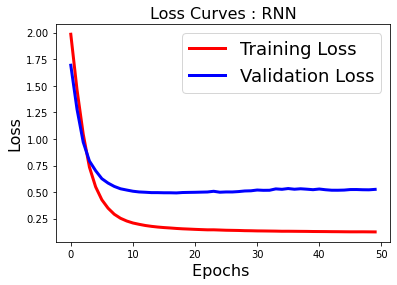

In [36]:
#Plot loss curve
fig=plt.figure()
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training Loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves : RNN',fontsize=16)
plt.show()

In [37]:
# import numpy as np
# start_time = time.time()
# embeddings_index = {}
# with open('zh_wiki_word2vec_300.txt', 'r',encoding="utf-8") as f:
#     for line in f:
#         values = line.split()
#         word = converter.convert(values[0])
# #         print(word)
#         coefs = np.asarray(values[1:], dtype='float32')
#         embeddings_index[word] = coefs
# #     content = f.read() # 讀取檔案內容

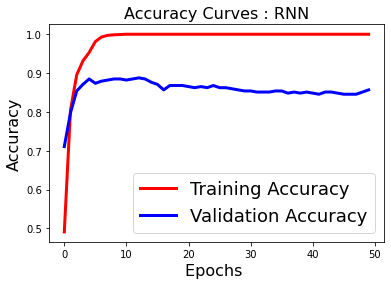

In [38]:
#Plot loss curve
fig=plt.figure()
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves : RNN',fontsize=16)
plt.show()

In [39]:
print(result)

[0 0 2 4 3 0 2 2 4 3 3 2 1 1 2 3 0 1 3 4 2 0 2 3 4 0 4 3 1 3 2 4 1 4 3 0 0
 3 3 4 1 3 2 0 0 2 0 2 2 3 4 1 3 1 3 0 1 2 3 3 2 3 3 2 1 3 4 2 0 2 2 1 0 4
 3 4 2 0 1 2 4 4 2 0 4 3 0 3 4 3 2 1 3 3 4 2 3 1 1 2 0 0 3 0 4 1 3 4 2 2 0
 2 2 3 0 1 0 3 4 3 3 4 3 3 4 1 1 0 0 1 0 3 4 0 1 0 4 0 3 3 4 0 3 4 0 4 2 3
 0 3 3 2 1 1 2 3 3 3 4 4 0 0 0 1 1 2 3 1 3 1 1 0 2 1 3 3 4 4 4 0 4 3 0 3 0
 0 3 1 0 4 0 4 4 4 4 0 2 3 3 2 3 1 2 1 3 1 4 2 3 3 0 1 3 0 3 4 3 4 2 0 0 4
 0 1 1 3 1 3 3 3 2 2 3 3 2 1 3 2 3 0 1 2 2 1 4 3 3 1 3 2 3 3 2 1 0 4 3 3 0
 3 3 0 0 3 1 1 1 3 4 2 3 2 0 2 2 4 3 0 3 1 1 2 1 0 1 3 4 0 4 0 2 2 0 3 2 4
 2 2 3 1 3 2 1 3 3 4 4 0 3 3 4 2 4 4 3 3 2 4 4 2 0 1 2 3 0 2 4 0 3 3 4 0 1
 1 3 2 0 0 0 4 3 3 2 4 2 2 4 0 0 4 3 4 4 3 2 4 2 3 2 3 1 3 3 4 2 0 0 4 4 0
 3 4 2 4 4 2 4 3 3 3 3 0 3 3 4 2 0 2 4 4 0 1 4 1 3 0 4 0 4 0 1 3 3 2 0 3 4
 0 4 4 2 2 3 2 1 4 1 2 3 3 3 1 0 2 4 4 3 3 3 2 3 3 3 1 1 4 3 3 0 2 1 4 1 3
 4]
